In [244]:
import kagglehub

path = kagglehub.dataset_download("eustusmurea/labtest-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Administrator\.cache\kagglehub\datasets\eustusmurea\labtest-dataset\versions\1


## Import necessary libraries

In [245]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data using pandas

In [246]:
data = pd.read_csv(r"C:\Users\Administrator\.cache\kagglehub\datasets\eustusmurea\labtest-dataset\versions\1\messy_cancer_lab_dataset.csv")

data.head()


,order_id,signout_date,lab_number,assigned_to_pathologist,patient_name,facility,test_category,test,sub_category,receiving_centers,processing_centers,creation_date,service,price,payment_method
0,NaN,2021-04-02,LAB81482,Dr. Smith,William Evans,St. Mary's Oncology,Immunohistochem,unknown,Leukemia,NaN,NaN,2022-05-09,routine,206,NaN
1,ORD6574,03/16/2021,LAB57052,Dr Jane Doe,NaN,NaN,Immunohistochem,ER/PR Testing,Lung Cancer,Unknown,Main Lab,06/20/2023,Consult,ksh 3833,NaN
2,ORD4814,02/17/2022,LAB31319,Justin Smith,Lori Diaz,General Hospital,Unknown,unknown,Leukemia,Lab B,central lab,10-Mar-25,Unknown,1016,Cash
3,ORD7572,08-Mar-21,LAB95909,Dr. Smyth,Juan Carrillo,St. Marys,Haematology,unknown,Lung CA,Main Lab,NaN,12-Jan-25,routine,2366,credit
4,ORD2796,23-Nov-20,LAB60019,Dr. John Lee,Joanna Tyler,Mercy Cancer Center,Cytology,unknown,Not Specified,NaN,Main Lab,2022-06-09,routine,ksh 0,Unknown


## Getting the information about the dataset

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 9484 non-null   object
 1   signout_date             9506 non-null   object
 2   lab_number               9502 non-null   object
 3   assigned_to_pathologist  8570 non-null   object
 4   patient_name             9451 non-null   object
 5   facility                 8736 non-null   object
 6   test_category            10000 non-null  object
 7   test                     9500 non-null   object
 8   sub_category             8911 non-null   object
 9   receiving_centers        8281 non-null   object
 10  processing_centers       8390 non-null   object
 11  creation_date            9756 non-null   object
 12  service                  8499 non-null   object
 13  price                    9303 non-null   object
 14  payment_method           8603 non-null 

## Checked for duplicates but found none

In [248]:
data.duplicated().sum()

0

## Check sum of null values in each column

In [249]:
data.isnull().sum()

order_id                    516
signout_date                494
lab_number                  498
assigned_to_pathologist    1430
patient_name                549
facility                   1264
test_category                 0
test                        500
sub_category               1089
receiving_centers          1719
processing_centers         1610
creation_date               244
service                    1501
price                       697
payment_method             1397
dtype: int64

## Changing date columns into datetime format

In [250]:
date_columns = ['creation_date', 'signout_date']
for coln in date_columns:
    data[coln] = pd.to_datetime(data[coln], format='mixed', errors='coerce')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 9484 non-null   object        
 1   signout_date             9030 non-null   datetime64[ns]
 2   lab_number               9502 non-null   object        
 3   assigned_to_pathologist  8570 non-null   object        
 4   patient_name             9451 non-null   object        
 5   facility                 8736 non-null   object        
 6   test_category            10000 non-null  object        
 7   test                     9500 non-null   object        
 8   sub_category             8911 non-null   object        
 9   receiving_centers        8281 non-null   object        
 10  processing_centers       8390 non-null   object        
 11  creation_date            9493 non-null   datetime64[ns]
 12  service                  8499 non

## Sorting the data to check the earliest creation date

In [251]:
data = data.sort_values(by="creation_date")
data.head()

,order_id,signout_date,lab_number,assigned_to_pathologist,patient_name,facility,test_category,test,sub_category,receiving_centers,processing_centers,creation_date,service,price,payment_method
8996,ORD8226,2020-06-28,LAB60323,Michael Harris,Kevin Jackson,Mercy Cancer Center,CYTOLOGY,Fine Needle Aspiration,Lymphoma,Main Lab,Unknown,2020-01-01,NaN,8038,Insurance
1835,NaN,2020-12-10,NaN,NaN,James Jackson,General Hospital,Histology,unknown,breast cancer,Unknown,central lab,2020-01-01,routine,ksh 9532,Unknown
4295,ORD6543,2020-10-31,LAB20596,Dr. Smyth,April Howard,City Cancer Clinic,Histology,unknown,Breast Cancer,Lab B,Lab C,2020-01-01,NaN,162,NaN
8638,ORD1765,2022-07-13,NaN,Robert Williams,Erin Miller,NaN,Immunohistochemistry,unknown,NaN,Lab B,Central Lab,2020-01-01,Routine,4570,Insurance
7556,ORD8366,2021-07-04,LAB58738,Dr. John Lee,Kimberly Kelly,City Cancer Clinic,IHC,unknown,Lung Cancer,Unknown,central lab,2020-01-02,STAT,8358,INS


## Filling missing creation_date rows with the earliest date which is "2020-01-01"

In [252]:
data['creation_date'] = data['creation_date'].fillna('2020-01-01')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 8996 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 9484 non-null   object        
 1   signout_date             9030 non-null   datetime64[ns]
 2   lab_number               9502 non-null   object        
 3   assigned_to_pathologist  8570 non-null   object        
 4   patient_name             9451 non-null   object        
 5   facility                 8736 non-null   object        
 6   test_category            10000 non-null  object        
 7   test                     9500 non-null   object        
 8   sub_category             8911 non-null   object        
 9   receiving_centers        8281 non-null   object        
 10  processing_centers       8390 non-null   object        
 11  creation_date            10000 non-null  datetime64[ns]
 12  service                  8499 non-n

## Sorting the dataset using the signout date

In [254]:
data = data.sort_values(by="signout_date")
data.head()

,order_id,signout_date,lab_number,assigned_to_pathologist,patient_name,facility,test_category,test,sub_category,receiving_centers,processing_centers,creation_date,service,price,payment_method
5868,ORD5193,2020-01-01,LAB85949,Dr. Smith,Shawn Smith,NaN,Haematology,HER2 Testing,Not Specified,Main Lab,Central Lab,2020-07-28,Routine,442,Insurance
3528,ORD1426,2020-01-01,LAB92649,Dr Jane Doe,Christopher Ramirez,St. Mary's Oncology,Hematology,unknown,Leukemia,Main Lab,Lab C,2022-11-15,STAT,ksh 0,Credit Card
5684,ORD9778,2020-01-01,LAB88622,Dr. Jane Doe,Robert Ward,City Cancer Clinic,Histology,Tissue Staining,Breast Cancer,Lab A,Lab C,2024-01-19,routine,7870,NaN
7384,ORD9018,2020-01-01,LAB14037,Tanya Johnson,Mrs. Teresa Hubbard,St. Mary's Oncology,Histology,unknown,NS,Unknown,Unknown,2024-06-25,STAT,ksh 0,Unknown
5753,ORD5515,2020-01-01,LAB36507,Dr. Smyth,Kurt Bailey,NaN,Immunohistochemistry,ER/PR Testing,Lymphoma,Lab A,Unknown,2020-01-01,routine,1962,NaN


## Filling the missing data values in signout_date with earliest date which is "2020-01-01"

In [255]:
data['signout_date'] = data['signout_date'].fillna('2020-01-01')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5868 to 9963
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 9484 non-null   object        
 1   signout_date             10000 non-null  datetime64[ns]
 2   lab_number               9502 non-null   object        
 3   assigned_to_pathologist  8570 non-null   object        
 4   patient_name             9451 non-null   object        
 5   facility                 8736 non-null   object        
 6   test_category            10000 non-null  object        
 7   test                     9500 non-null   object        
 8   sub_category             8911 non-null   object        
 9   receiving_centers        8281 non-null   object        
 10  processing_centers       8390 non-null   object        
 11  creation_date            10000 non-null  datetime64[ns]
 12  service                  8499 non-n

## Create a function that can clean price column and applying it

In [256]:
def clean_price(value):
    if pd.isnull(value):
        return None
    # Remove text like "ksh", "KES", and commas
    value = str(value).lower().replace('ksh', '').replace('kes', '').replace(',', '').strip()
    try:
        return float(value)
    except:
        return None

# Apply the cleaning function
data['price'] = data['price'].apply(clean_price)
data.head()

,order_id,signout_date,lab_number,assigned_to_pathologist,patient_name,facility,test_category,test,sub_category,receiving_centers,processing_centers,creation_date,service,price,payment_method
5868,ORD5193,2020-01-01,LAB85949,Dr. Smith,Shawn Smith,NaN,Haematology,HER2 Testing,Not Specified,Main Lab,Central Lab,2020-07-28,Routine,442.0,Insurance
3528,ORD1426,2020-01-01,LAB92649,Dr Jane Doe,Christopher Ramirez,St. Mary's Oncology,Hematology,unknown,Leukemia,Main Lab,Lab C,2022-11-15,STAT,0.0,Credit Card
5684,ORD9778,2020-01-01,LAB88622,Dr. Jane Doe,Robert Ward,City Cancer Clinic,Histology,Tissue Staining,Breast Cancer,Lab A,Lab C,2024-01-19,routine,7870.0,NaN
7384,ORD9018,2020-01-01,LAB14037,Tanya Johnson,Mrs. Teresa Hubbard,St. Mary's Oncology,Histology,unknown,NS,Unknown,Unknown,2024-06-25,STAT,0.0,Unknown
5753,ORD5515,2020-01-01,LAB36507,Dr. Smyth,Kurt Bailey,NaN,Immunohistochemistry,ER/PR Testing,Lymphoma,Lab A,Unknown,2020-01-01,routine,1962.0,NaN


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5868 to 9963
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 9484 non-null   object        
 1   signout_date             10000 non-null  datetime64[ns]
 2   lab_number               9502 non-null   object        
 3   assigned_to_pathologist  8570 non-null   object        
 4   patient_name             9451 non-null   object        
 5   facility                 8736 non-null   object        
 6   test_category            10000 non-null  object        
 7   test                     9500 non-null   object        
 8   sub_category             8911 non-null   object        
 9   receiving_centers        8281 non-null   object        
 10  processing_centers       8390 non-null   object        
 11  creation_date            10000 non-null  datetime64[ns]
 12  service                  8499 non-n

## Plotted a boxplot to check for outliers in price column but I found none

<Axes: ylabel='price'>

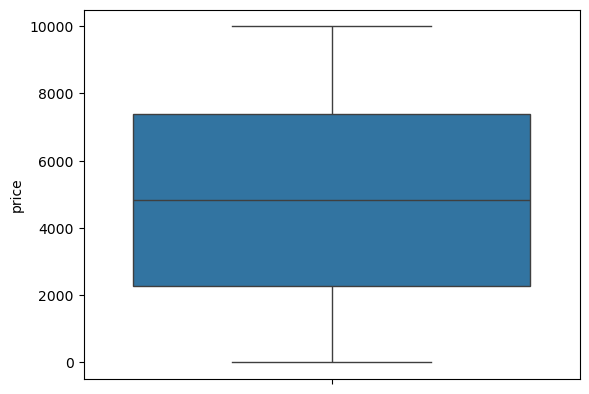

In [258]:
sns.boxplot(y='price', data = data)

## Since it has no outliers, I filled the missing price values with the mean

In [259]:
data['price'] = data['price'].fillna(data['price'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5868 to 9963
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 9484 non-null   object        
 1   signout_date             10000 non-null  datetime64[ns]
 2   lab_number               9502 non-null   object        
 3   assigned_to_pathologist  8570 non-null   object        
 4   patient_name             9451 non-null   object        
 5   facility                 8736 non-null   object        
 6   test_category            10000 non-null  object        
 7   test                     9500 non-null   object        
 8   sub_category             8911 non-null   object        
 9   receiving_centers        8281 non-null   object        
 10  processing_centers       8390 non-null   object        
 11  creation_date            10000 non-null  datetime64[ns]
 12  service                  8499 non-n

## Filled the rest missing values in columns with dtypes object with "Unknown"

In [260]:
for col in data.select_dtypes(include='object').columns:
        data[col] = data[col].fillna('Unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5868 to 9963
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 10000 non-null  object        
 1   signout_date             10000 non-null  datetime64[ns]
 2   lab_number               10000 non-null  object        
 3   assigned_to_pathologist  10000 non-null  object        
 4   patient_name             10000 non-null  object        
 5   facility                 10000 non-null  object        
 6   test_category            10000 non-null  object        
 7   test                     10000 non-null  object        
 8   sub_category             10000 non-null  object        
 9   receiving_centers        10000 non-null  object        
 10  processing_centers       10000 non-null  object        
 11  creation_date            10000 non-null  datetime64[ns]
 12  service                  10000 non-

# Data Standardization

## Standardized facility column

In [261]:
data['facility'].value_counts()

facility
Unknown                2564
St. Marys              1284
mercy cancer center    1272
General Hospital       1247
Mercy Cancer Center    1228
City Cancer Clinic     1203
St. Mary's Oncology    1202
Name: count, dtype: int64

In [262]:
data['facility'] = data['facility'].replace({
    'St. Marys': "St. Mary's Oncology",
    'mercy cancer center': 'Mercy Cancer Center',
})
data['facility'] = data['facility'].str.title().str.strip()
data['facility'].value_counts()

facility
Unknown                2564
Mercy Cancer Center    2500
St. Mary'S Oncology    2486
General Hospital       1247
City Cancer Clinic     1203
Name: count, dtype: int64

## Standardized test_category column

In [263]:
data['test_category'].value_counts()

test_category
Immunohistochemistry    1043
Cytology                1037
Hematology              1035
Haematology             1029
CYTOLOGY                1010
histology               1002
Unknown                  994
IHC                      980
Immunohistochem          955
Histology                915
Name: count, dtype: int64

In [264]:
data['test_category'] = data['test_category'].replace({
    'Hematology': "Haematology",
    'histology': 'Histology',
    'Immunohistochem' : 'Immunohistochemistry',
    'IHC' : 'Immunohistochemistry'
})
data['test_category'] = data['test_category'].str.title().str.strip()
data['test_category'].value_counts()

test_category
Immunohistochemistry    2978
Haematology             2064
Cytology                2047
Histology               1917
Unknown                  994
Name: count, dtype: int64

## Standardized test column

In [265]:
data['test'].value_counts()

test
unknown                   3135
ER/PR Testing             1674
HER2 Testing              1539
Cytology Smear             667
Fine Needle Aspiration     650
Tissue Staining            599
Biopsy                     575
Unknown                    500
Blood Count                333
Bone Marrow Aspiration     328
Name: count, dtype: int64

In [266]:
data['test'] = data['test'].str.title().str.strip()
data['test'].value_counts()

test
Unknown                   3635
Er/Pr Testing             1674
Her2 Testing              1539
Cytology Smear             667
Fine Needle Aspiration     650
Tissue Staining            599
Biopsy                     575
Blood Count                333
Bone Marrow Aspiration     328
Name: count, dtype: int64

## Standardized sub_category column

In [267]:
data['sub_category'].value_counts()

sub_category
Lung CA          1145
Lung Cancer      1143
breast cancer    1128
Breast Cancer    1125
NS               1122
Not Specified    1121
Unknown          1089
Leukemia         1083
Lymphoma         1044
Name: count, dtype: int64

In [268]:
data['sub_category'] = data['sub_category'].replace({
    'Lung CA': "Lung Cancer",
    'NS': 'Unknown',
    'Not Specified' : 'Unknown',
    'IHC' : 'Immunohistochemistry'
})
data['sub_category'] = data['sub_category'].str.title().str.strip()
data['sub_category'].value_counts()

sub_category
Unknown          3332
Lung Cancer      2288
Breast Cancer    2253
Leukemia         1083
Lymphoma         1044
Name: count, dtype: int64

## Standardized receiving_centers column

In [269]:
data['receiving_centers'] = data['receiving_centers'].str.title().str.strip()
data['receiving_centers'].value_counts()

receiving_centers
Unknown     3377
Lab A       3268
Lab B       1680
Main Lab    1675
Name: count, dtype: int64

## Standardized processing_centers column

In [270]:
data['processing_centers'] = data['processing_centers'].str.title().str.strip()
data['processing_centers'].value_counts()

processing_centers
Central Lab    3305
Unknown        3274
Main Lab       1721
Lab C          1700
Name: count, dtype: int64

## Standardized service column

In [271]:
data['service'] = data['service'].str.title().str.strip()
data['service'].value_counts()

service
Unknown    2898
Routine    2837
Consult    1464
Urgent     1423
Stat       1378
Name: count, dtype: int64

## Standardized payment_method column

In [272]:
data['payment_method'].value_counts()

payment_method
Unknown        2866
Cash           1465
INS            1444
Credit Card    1440
credit         1396
Insurance      1389
Name: count, dtype: int64

In [273]:
data['payment_method'] = data['payment_method'].replace({
    'INS': 'Insurance'
})
data['payment_method'] = data['payment_method'].str.title().str.strip()
data['payment_method'].value_counts()

payment_method
Unknown        2866
Insurance      2833
Cash           1465
Credit Card    1440
Credit         1396
Name: count, dtype: int64

## Visualization

### 1. Bar Chart – Total Price by Facility

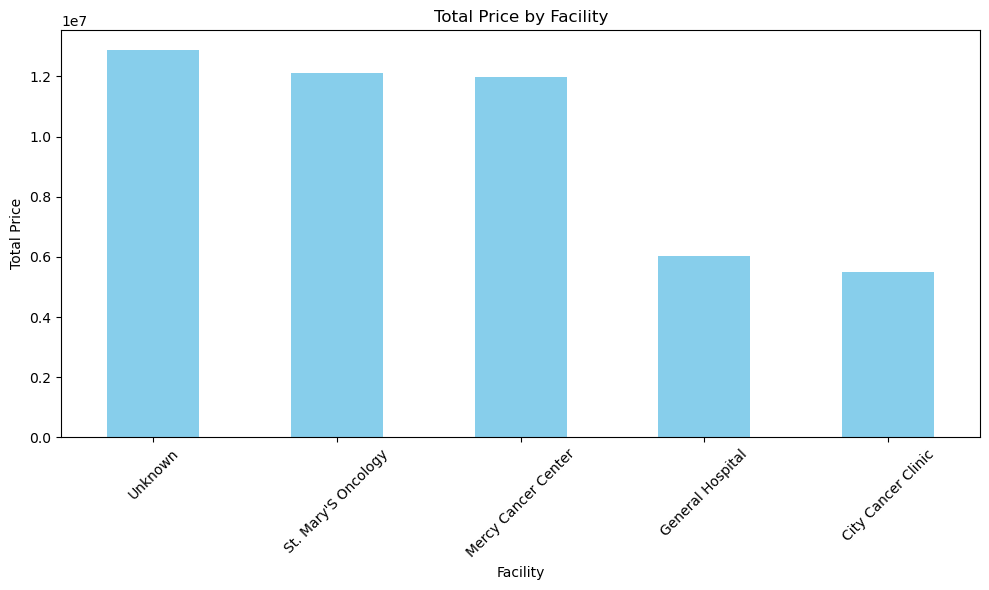

In [274]:
# Group by facility and sum price
facility_price = data.groupby('facility')['price'].sum().sort_values(ascending=False).head(10)

# Plot
facility_price.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Price by Facility')
plt.xlabel('Facility')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. Bar Chart – Test Category Count

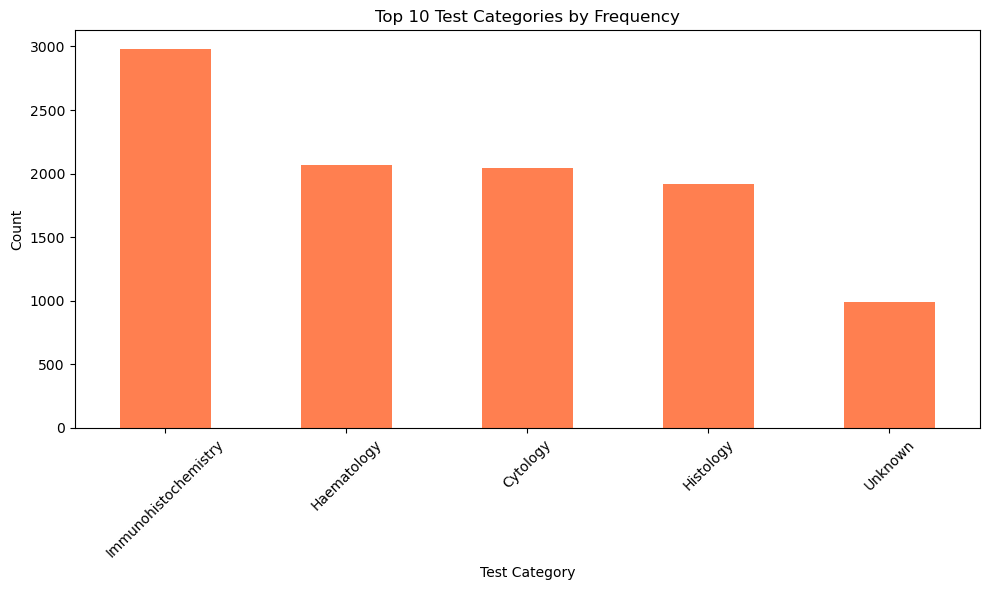

In [275]:
test_cat_counts = data['test_category'].value_counts().head(10)

test_cat_counts.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Top 10 Test Categories by Frequency')
plt.xlabel('Test Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. Pie Chart – Payment Method Distribution

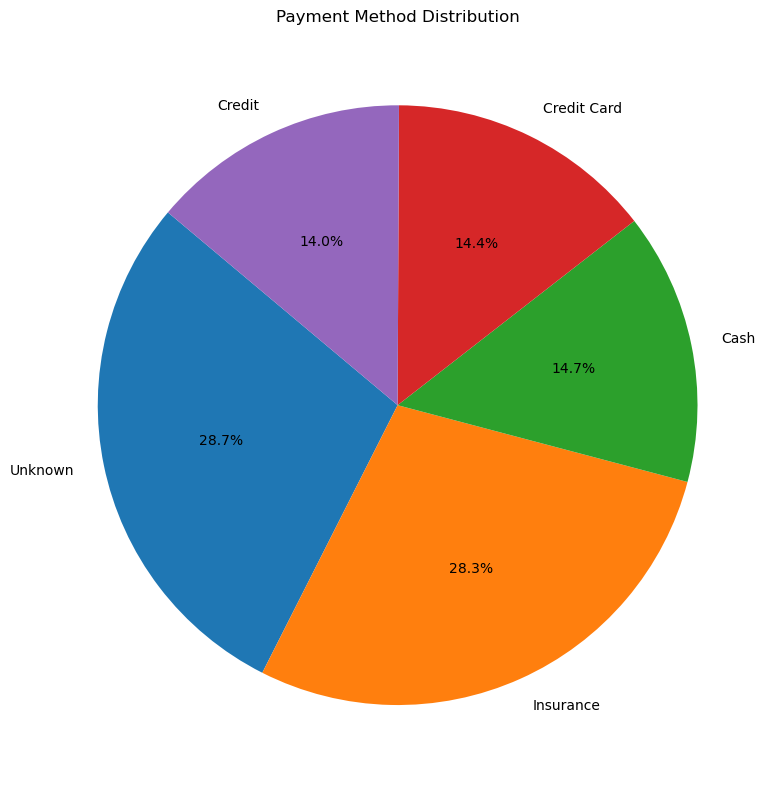

In [276]:
payment_dist = data['payment_method'].value_counts()

payment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


### 4. Boxplot – Price Distribution by Test Category

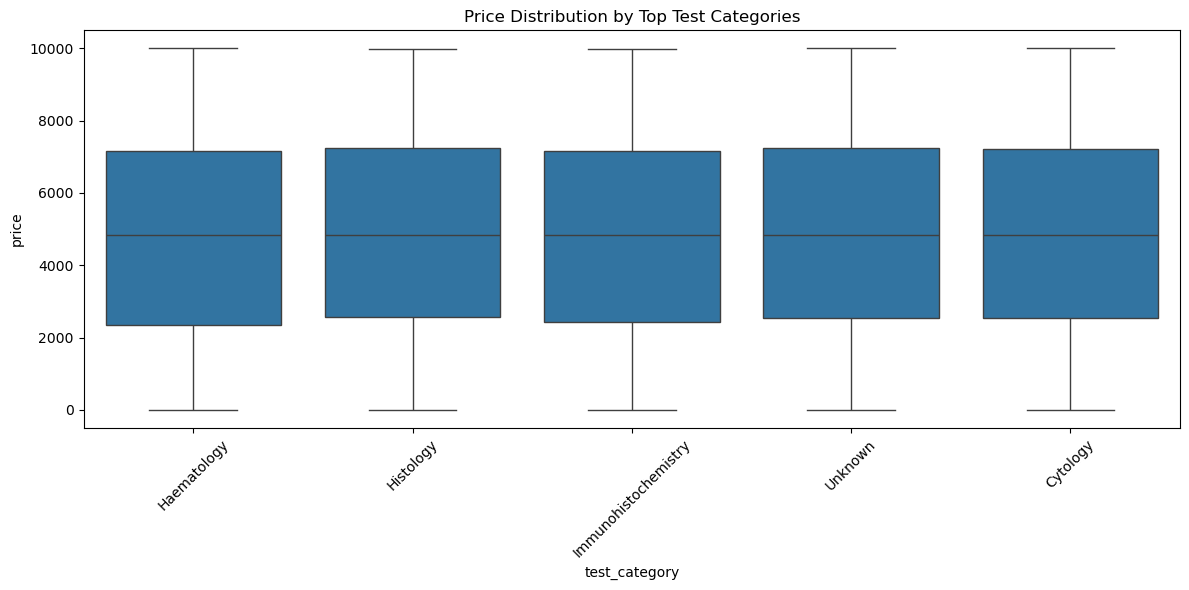

In [277]:
plt.figure(figsize=(12, 6))
top_categories = data['test_category'].value_counts().head(5).index
sns.boxplot(x='test_category', y='price', data=data[data['test_category'].isin(top_categories)])
plt.title('Price Distribution by Top Test Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Loaded the cleaned dataset in the csv file

In [278]:
data.to_csv("Cleaned_dataset.csv", index=False)

# Connect to a PostgreSql database and Load Data

In [279]:
from dotenv import load_dotenv
import os
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

In [280]:
# Load .env variables
load_dotenv()

# 1. Connect postgres using psycopg2
connection = psycopg2.connect(  
    host=os.getenv("db_host"),
    database=os.getenv("db_name"),
    user=os.getenv("db_user"),
    password=os.getenv("db_pass"),
    port=os.getenv("db_port")   
)
cursor = connection.cursor()

In [281]:
create_table_query = """
CREATE TABLE IF NOT EXISTS lab_tests (
    order_id TEXT PRIMARY KEY,
    signout_date DATE,
    lab_number TEXT,
    assigned_to_pathologist TEXT,
    patient_name TEXT,
    facility TEXT,
    test_category TEXT,
    test TEXT,
    sub_category TEXT,
    receiving_centers TEXT,
    processing_centers TEXT,
    creation_date DATE,
    creation_year TEXT,
    creation_weekday TEXT,
    service TEXT,
    price FLOAT,
    payment_method TEXT,
    delay_days INT
);
"""


In [282]:
cursor.execute(create_table_query)
connection.commit()

In [283]:
# 2. Create SQLAlchemy engine and use pandas.to_sql() ---
db_url = f"postgresql://{os.getenv('db_user')}:{os.getenv('db_pass')}@" \
         f"{os.getenv('db_host')}:{os.getenv('db_port')}/{os.getenv('db_name')}"

engine = create_engine(db_url)

In [284]:
# Load DataFrame into PostgreSQL table
data.to_sql('lab_tests', engine, if_exists='replace', index=False)

print("Data successfully loaded into PostgreSQL database.")

Data successfully loaded into PostgreSQL database.
